In [71]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')   # 경고 메시지를 무시하고 숨기기

In [72]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.shape

(7043, 21)

In [73]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [74]:
df = data[['PaymentMethod','TotalCharges']]
df.head()

,PaymentMethod,TotalCharges
0,Electronic check,29.85
1,Mailed check,1889.5
2,Mailed check,108.15
3,Bank transfer (automatic),1840.75
4,Electronic check,151.65


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PaymentMethod  7043 non-null   object
 1   TotalCharges   7043 non-null   object
dtypes: object(2)
memory usage: 110.2+ KB


In [76]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [77]:
df[df['TotalCharges'] == ' ']

,PaymentMethod,TotalCharges
488,Bank transfer (automatic),
753,Mailed check,
936,Mailed check,
1082,Mailed check,
1340,Credit card (automatic),
3331,Mailed check,
3826,Mailed check,
4380,Mailed check,
5218,Mailed check,
6670,Mailed check,


In [78]:
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.nan)

In [79]:
df.isnull().sum()

PaymentMethod     0
TotalCharges     11
dtype: int64

In [80]:
df = df.dropna()
df.isnull().sum()

PaymentMethod    0
TotalCharges     0
dtype: int64

In [81]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PaymentMethod  7032 non-null   object 
 1   TotalCharges   7032 non-null   float64
dtypes: float64(1), object(1)
memory usage: 164.8+ KB


### 정규성

In [110]:
from scipy import stats

In [111]:
stats.shapiro(df.TotalCharges[df.PaymentMethod == 'Electronic check'])

ShapiroResult(statistic=0.8496638536453247, pvalue=9.388699710976274e-43)

<AxesSubplot:xlabel='TotalCharges'>

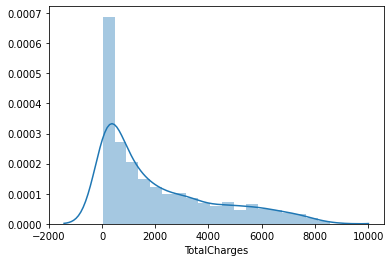

In [127]:
sns.distplot(df['TotalCharges'][df['PaymentMethod'] == 'Electronic check'])

In [129]:
stats.shapiro(df.TotalCharges[df.PaymentMethod == 'Mailed check'])

ShapiroResult(statistic=0.7103850841522217, pvalue=0.0)

<AxesSubplot:xlabel='TotalCharges'>

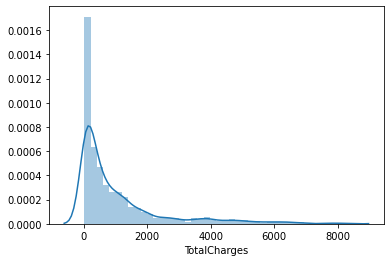

In [128]:
sns.distplot(df['TotalCharges'][df['PaymentMethod'] == 'Mailed check'])

In [113]:
stats.shapiro(df.TotalCharges[df.PaymentMethod == 'Bank transfer (automatic)'])

ShapiroResult(statistic=0.9228513240814209, pvalue=2.1227973477445325e-27)

<AxesSubplot:xlabel='TotalCharges'>

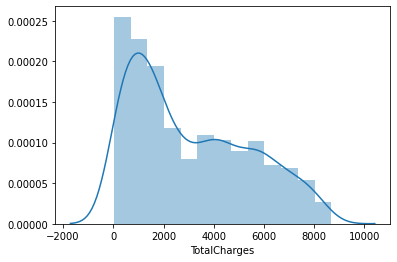

In [130]:
sns.distplot(df.TotalCharges[df.PaymentMethod == 'Bank transfer (automatic)'])

In [114]:
stats.shapiro(df.TotalCharges[df.PaymentMethod == 'Credit card (automatic)'])

ShapiroResult(statistic=0.9175280332565308, pvalue=5.072573028390406e-28)

<AxesSubplot:xlabel='TotalCharges'>

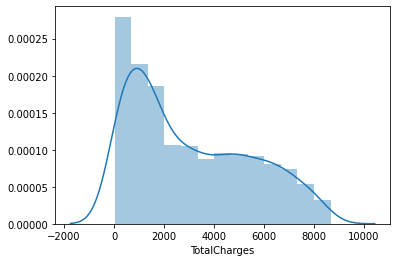

In [131]:
sns.distplot(df.TotalCharges[df.PaymentMethod == 'Credit card (automatic)'])

### 등분산성 (레빈 검증)

In [133]:
stats.levene(
    df.TotalCharges[df.PaymentMethod == 'Electronic check'],
    df.TotalCharges[df.PaymentMethod == 'Mailed check'],
    df.TotalCharges[df.PaymentMethod == 'Bank transfer (automatic)'],
    df.TotalCharges[df.PaymentMethod == 'Credit card (automatic)']
)

LeveneResult(statistic=218.92648509314012, pvalue=8.911827609146999e-136)

### 독립성

In [83]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [84]:
model = ols('TotalCharges ~ C(PaymentMethod)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(PaymentMethod),3.0,4.431319e+09,1.477106e+09,327.523683,4.608040e-199
Residual,7028.0,3.169573e+10,4.509922e+06,NaN,NaN
